In [2]:
from __future__ import annotations
from dataclasses import dataclass
from typing import Tuple, Union, List
from enum import Enum, auto
from functools import cached_property
from functools import reduce
from operator import mul
from layout_module import NestedTuple, Atom, Profile, Layout, Pointed
from layout_module import nested_tuple_algebra as na
from layout_module import flat_algebra as fa 
from layout_module import layout_algebra as la
from collections import defaultdict


In [3]:
A = (6,2)
A_d = (8,2)
B = (4,3)
B_d =(3,1)
A_size = reduce(mul, A, 1)
for x in range(A_size): 
  print(fa.layout_map(A,A_d,(fa.layout_map(B,B_d,x))))


0
24
2
26
8
32
10
34
16
40
18
42


In [4]:
P = NestedTuple.from_literal((3,2,2))
P_d = NestedTuple.from_literal((8,24,2))
L = Layout(P,P_d)
print(L)
print(L.coalesce())

Layout(shape=(3, 2, 2), stride=(8, 24, 2))
Layout(shape=(6, 2), stride=(8, 2))


In [5]:
Q = NestedTuple.from_literal((2,2,3))
Q_d = NestedTuple.from_literal((3,6,1))
H = Layout(Q,Q_d)
print(H)
print(H.coalesce())

Layout(shape=(2, 2, 3), stride=(3, 6, 1))
Layout(shape=(4, 3), stride=(3, 1))


In [6]:
A = (6,2)
A_d = (8,2)
B = (4,3)
B_d =(3,1)
A_size = reduce(mul, A, 1)
for x in range(A_size): 
  print(fa.layout_map(A,A_d,(fa.layout_map(B,B_d,x))))

print ("---------------")
C = (2,2,3)
C_d = (24,2,8)
for x in range(A_size): 
  print (fa.layout_map(C,C_d, x))
print ("---------------")
for x in range(A_size): 
  B_x = fa.layout_map(B,B_d, x)
  A_after_B_x = fa.layout_map(A,A_d, B_x)
  C_x = fa.layout_map(C,C_d, x)
  print(A_after_B_x == C_x)

0
24
2
26
8
32
10
34
16
40
18
42
---------------
0
24
2
26
8
32
10
34
16
40
18
42
---------------
True
True
True
True
True
True
True
True
True
True
True
True


In [7]:
"""_summary_
in terms of morphisms in nest, we have A_eq (6,2) ---> (2,2,2,6) B_eq (4,3) ---> (3,4)
so if we want to compose A o B, we have B on the left, and A on the right that is we refine 
A's domain, and refine B's co-domain in this setting
"""

"_summary_\nin terms of morphisms in nest, we have A_eq (6,2) ---> (2,2,2,6) B_eq (4,3) ---> (3,4)\nso if we want to compose A o B, we have B on the left, and A on the right that is we refine \nA's domain, and refine B's co-domain in this setting\n"

In [8]:
A_dom = NestedTuple.from_literal((6,2)) 
B_codom = NestedTuple.from_literal((3,4))
na.mutual_refinement(A_dom, B_codom)

(((3, 2), (2,)), ((3,), (2, 2)))

In [9]:
P = NestedTuple.from_literal((8,8,8))
Q = NestedTuple.from_literal((2,8,8,8))
h,k = na.mutual_refinement(P,Q)
print(h)
print(k)

((2, 4), (2, 4), (2, 4))
((2,), (4, 2), (4, 2), (4, 2))


In [10]:
S = NestedTuple.from_literal((4,2,2,32))
T = NestedTuple.from_literal((32,32))
u,v = na.mutual_refinement(S,T)
print(u)
print(v)

((4,), (2,), (2,), (2, 16))
((4, 2, 2, 2), (16, 2))


In [12]:
domain = (12,24,2,7)
ast = Pointed.astr
map = (ast, 4, ast, 1)
co_domain = (13,7,5,4,24)

mor = flat_tuple_morphism(domain, co_domain, map)

In [13]:
mor

flat_tuple_morphism(domain=(12, 24, 2, 7), co_domain=(13, 7, 5, 4, 24), map=(.*., 4, .*., 1))

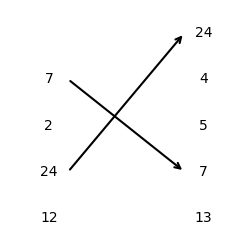

In [14]:
mor.draw()

In [15]:
s = (3,4,2,1)
d = (1,6,0,24)
co_domain,map = fa.flat_layout_to_mor(s,d)


In [16]:
co_domain

(3, 2, 4, 1)

In [17]:
map

(0, 2, .*., 3)

In [18]:
mor = flat_tuple_morphism(s, co_domain, map)

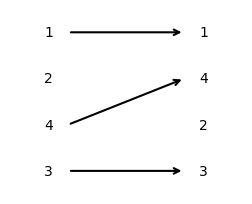

In [19]:
mor.draw()